<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Part4_Simulation_master_project_alitalebi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


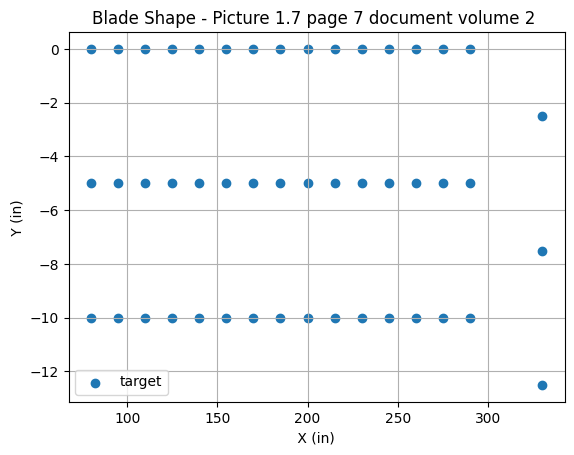

In [ ]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [ ]:
dict_28_24_blade_1 = {"r/R"           :[0.2001 , 0.2499 ,0.2998 , 0.3498 , 0.3913 , 0.4496 , 0.4997 , 0.5387 , 0.5996 , 0.6498 , 0.6998 , 0.7500 , 0.8001 , 0.8497 , 0.9102 , 0.9734 ] ,
              "Delta XMean (in.)"     : [-0.0045 , -0.0011 , -0.0281 , -0.0177 , -0.0113 , -0.0186 , -0.0133 , -0.0232 , -0.0338 , -0.0307 , -0.0633 , -0.0773 , -0.0811 , -0.1920 , -0.2623 , -0.2629 ] ,
              "Delta XStd (in.)"      : [0.0010 , 0.0009 , 0.0011 , 0.0011 , 0.0016 , 0.0019 , 0.0022 , 0.0020 , 0.0019 , 0.0023 , 0.0021 , 0.0021 , 0.0021 , 0.0022 , 0.0023 , 0.0026 ] ,
              "Delta YMean (in.)"     : [-0.0132 , -0.0225 , -0.0483 , -0.0939 , -0.1256 , -0.1809 , -0.2209 , -0.2510 , -0.3087 , -0.3422 , -0.3874 , -0.4184 , -0.5123 , -0.5296 , -0.5487 , -0.5354 ] ,
              "Delta YStd (in.)"      : [0.0007 , 0.0013 , 0.0028 , 0.0046 , 0.0066 , 0.0088 , 0.0111 , 0.0126 , 0.0150 , 0.0176 , 0.0201 , 0.0229 , 0.0258 , 0.0284 , 0.0313 , 0.0350 ]  ,
              "Delta ZMean (in.)"     : [-0.0050 , -0.0010 , -0.0251  ,-0.0442 , -0.0622 , -0.1306 , -0.2121 , -0.3077 , -0.4860 , -0.7122 , -0.9213 , -1.1503 , -1.3874 , -1.7166 , -2.1240 , -2.5162 ] ,
              "Delta ZStd (in.)"      : [0.0023 , 0.0046 , 0.0089 , 0.0145 , 0.0211 , 0.0267 , 0.0347 , 0.0404 , 0.0480 , 0.0540 , 0.0607 , 0.0666 , 0.0718 , 0.0784 , 0.0857 , 0.0943 ] ,
              "Delta TwistMean (deg)" : [-0.0685 , 0.2730 , 0.0049  , 0.0060 , 0.0002 , -0.1528 , -0.1632 , -0.3044 , -0.2646 , -0.4566 , -0.4899 , -0.3256 , 0.0164 , -0.3486 , -0.6888 , -0.6556 ] ,
              "Delta TwistStd (deg)"  : [0.0233 , 0.0392 , 0.0515 , 0.0431 , 0.0476 , 0.0461 , 0.0479 , 0.0528 , 0.0516 , 0.0503 , 0.0581 , 0.0443 , 0.0504 , 0.0462  , 0.0444 , 0.0510]
}


table_28_24_blade_1 = pd.DataFrame(dict_28_24_blade_1)

In [ ]:
table_28_24_blade_1

,r/R,Delta XMean (in.),Delta XStd (in.),Delta YMean (in.),Delta YStd (in.),Delta ZMean (in.),Delta ZStd (in.),Delta TwistMean (deg),Delta TwistStd (deg)
0,0.2001,-0.0045,0.0010,-0.0132,0.0007,-0.0050,0.0023,-0.0685,0.0233
1,0.2499,-0.0011,0.0009,-0.0225,0.0013,-0.0010,0.0046,0.2730,0.0392
2,0.2998,-0.0281,0.0011,-0.0483,0.0028,-0.0251,0.0089,0.0049,0.0515
3,0.3498,-0.0177,0.0011,-0.0939,0.0046,-0.0442,0.0145,0.0060,0.0431
4,0.3913,-0.0113,0.0016,-0.1256,0.0066,-0.0622,0.0211,0.0002,0.0476
5,0.4496,-0.0186,0.0019,-0.1809,0.0088,-0.1306,0.0267,-0.1528,0.0461
6,0.4997,-0.0133,0.0022,-0.2209,0.0111,-0.2121,0.0347,-0.1632,0.0479
7,0.5387,-0.0232,0.0020,-0.2510,0.0126,-0.3077,0.0404,-0.3044,0.0528
8,0.5996,-0.0338,0.0019,-0.3087,0.0150,-0.4860,0.0480,-0.2646,0.0516
9,0.6498,-0.0307,0.0023,-0.3422,0.0176,-0.7122,0.0540,-0.4566,0.0503


In [ ]:
params = []
total_request = 5
send_request = 0
while  send_request <  total_request :
  want_class , how_mach_crack , locate = input("please enter want class and how much coef_ and apply where [seperate with #]" ).split("#")
  how_mach_crack = float(how_mach_crack)
  locate = int(locate)

  related_x = 1
  related_y = 1
  related_z = 1

  for iteration  in range(100) :

    new_data_simulated_from_table_28_24 = []
    for i in range(table_28_24_blade_1.shape[0]) :
      x_mean = table_28_24_blade_1.iloc[ i , 1 ]
      x_std  = table_28_24_blade_1.iloc[ i , 2 ]
      y_mean = table_28_24_blade_1.iloc[ i , 3 ]
      y_std  = table_28_24_blade_1.iloc[ i , 4 ]
      z_mean = table_28_24_blade_1.iloc[ i , 5 ]
      z_std  = table_28_24_blade_1.iloc[ i , 6 ]

      if i >locate :
        x_mean *= how_mach_crack
        x_std *= how_mach_crack
        y_mean *= how_mach_crack
        y_std *= how_mach_crack
        z_mean *=how_mach_crack
        z_std *= how_mach_crack



      for element in total_points[i*3 : (i+1)*3 , : ] :
        x_sample = element[0]
        y_sample = element[1]
        z_sample = element[2]



        rng = np.random.default_rng()

        x_added = rng.normal(x_mean, x_std , size=1 )
        x_added = x_added.tolist()[0]
        x_sample += related_x * x_added

        y_added = rng.normal(y_mean, y_std , size=1 )
        y_added = y_added.tolist()[0]
        y_sample += related_y * y_added

        z_added = rng.normal(z_mean, z_std , size=1 )
        z_added = z_added.tolist()[0]
        z_sample += related_z * z_added


        new_data_simulated_from_table_28_24.append([x_sample ,y_sample , z_sample ])

    new_data_simulated_from_table_28_24 = np.array(new_data_simulated_from_table_28_24)
    U1, V1 = np.meshgrid(new_data_simulated_from_table_28_24[ : ,  0 ]  , new_data_simulated_from_table_28_24[ : , 1 ] )
    U, V = np.meshgrid(total_points[ : ,  0 ]  , total_points[ : , 1 ] )


    fig = plt.figure(figsize = (50 , 15 ) )

    ax01 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
    ax02 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
    ax03 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
    ax1 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
    ax01.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1  )
    ax01.view_init(elev=5., azim=-85)


    ax02.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1  )
    ax02.view_init(elev=20, azim=-50)


    ax03.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1  )
    ax03.view_init(elev=25, azim=-45)



    ax1.scatter3D(new_data_simulated_from_table_28_24[ : ,  0 ], new_data_simulated_from_table_28_24[ : , 1 ] , new_data_simulated_from_table_28_24[ : , 2  ] , color = "red" )
    ax1.scatter3D(total_points[ : ,  0 ], total_points[ : , 1 ] , total_points[ : , 2  ] , color = "aqua" )

    df = pd.DataFrame()
    df['X_'] = new_data_simulated_from_table_28_24[ : ,  0 ]
    df['Y_'] = new_data_simulated_from_table_28_24[ : ,  1 ]
    df['Z_'] = new_data_simulated_from_table_28_24[ : ,  2 ]

    poly = PolynomialFeatures(degree = 2 )
    x_poly = poly.fit_transform(df[['X_' , 'Y_']])
    scaler = StandardScaler()
    df_stander = pd.DataFrame(scaler.fit_transform(x_poly) , columns = ['0' , 'X' , 'Y' , 'x1^2' , 'x1x2' , 'x2^2' , ] )

    df_stander['Z_'] = df['Z_']
    x_train , x_test , z_train , z_test  = train_test_split(df_stander[['0' , 'X' , 'Y' , 'x1^2' , 'x1x2' , 'x2^2' ]] , df_stander["Z_" ])
    model = LinearRegression()
    model.fit(x_train,z_train )

    z_predict = model.predict(x_test )
    print("Mse is : " , mean_squared_error(z_predict ,z_test ) )

    intercept_0 = model.intercept_
    coef1 = model.coef_[0]
    coef2 = model.coef_[1]
    coef3 = model.coef_[2]
    coef4 = model.coef_[3]
    coef5 = model.coef_[4]
    coef6 = model.coef_[5]


    total_new_generate = []
    total_error = []
    for i in range(len(df['X_'])) :
      new_value = intercept_0 + coef1 * df_stander.iloc[i , 0 ] + coef2 * df_stander.iloc[i , 1 ] + coef3 * df_stander.iloc[i , 2 ] + coef4 * df_stander.iloc[i , 3 ] + coef5 * df_stander.iloc[i , 4 ]
      + coef6 * df_stander.iloc[i , 5 ]
      total_new_generate.append(new_value)
      error = df_stander.iloc[ i , -1 ] - new_value
      total_error.append(error)


    ax5 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
    U5_meshgrid , V5_meshgrid = np.meshgrid(df['X_'], df[ 'Y_' ])
    ax5.plot_surface( U5_meshgrid , V5_meshgrid , np.array(total_new_generate).reshape(1 , -1 ) )

    ax6 = fig.add_subplot(1 , 6 , 6 , projection='3d' )
    ax6.scatter3D( new_data_simulated_from_table_28_24[ : ,  0 ], new_data_simulated_from_table_28_24[ : , 1 ] , new_data_simulated_from_table_28_24[ : , 2  ] , color = "red" )
    ax6.scatter3D( new_data_simulated_from_table_28_24[ : ,  0 ], new_data_simulated_from_table_28_24[ : , 1 ] ,  np.array(total_new_generate).reshape(1 , -1 ) , color = "b" )



    fig2 = plt.figure(figsize = (15 , 5 ))
    ax9 = fig2.add_subplot(111 )
    ax9.scatter(range(len(df)) , total_error   , label='error')
    ax9.legend()
    ax9.grid()

    #print(f"Formula : z = {intercept_0}+{b}x+{c}y")

    params.append([intercept_0 ,coef1 , coef2 , coef3 , coef4 , coef5 , coef6  , mean_squared_error(z_predict ,z_test ) , f'{want_class}' ] )
    total_change = [-1 , 1 ]
    related_x *= total_change[np.random.randint(0 , 2 )]
    related_y *= total_change[np.random.randint(0 , 2 )]
    related_z *= total_change[np.random.randint(0 , 2 )]
    plt.show()

  send_request += 1




<Axes: >

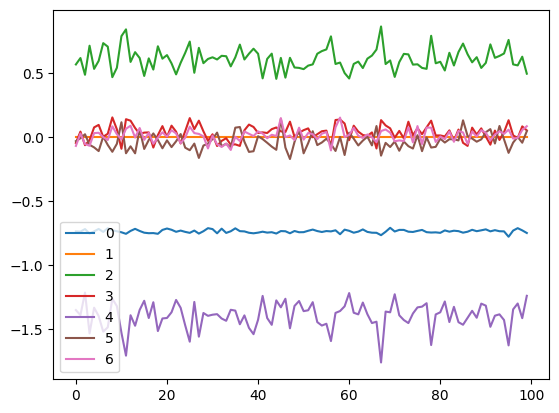

In [ ]:
params = np.array(params)
df_params = pd.DataFrame({'0':params[: , 0 ] , '1':params[ : , 1 ] , '2':params[ : , 2 ] , '3':params[ : , 3 ] ,  '4':params[ : , 4 ] , '5':params[ : , 5 ] , '6':params[ : , 6 ]} )
df_params.plot()

In [ ]:
np.random.randint(-1 , 2 )

1